## Project Title: Home value prediction

In [196]:
import pandas as pd
import numpy as np

In [197]:
# load data
data=pd.read_csv('housing_data.csv')
data

,ID,Date House was Sold,Home value,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14-May-17,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15-Feb-16,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14-Jun-17,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15-Jan-16,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Home value                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [199]:
# no.of missing value 
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Home value                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [201]:
# handling missing values in target variable

data.dropna(inplace=True,axis=0,subset=['Home value'])

In [202]:
# handling missing values in independent variable

from sklearn.impute import SimpleImputer
num_col = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
           'Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']
num_col
imputer =SimpleImputer(missing_values=np.nan,strategy='median')
data[num_col]=imputer.fit_transform(data[num_col])


In [203]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Home value                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19485
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         0
Longitude                                        0
Living Area after Renovation (i

In [204]:
# handling missing value in zipcode
col=data['Zipcode'].values.reshape(-1,1)
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(col)

In [205]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Home value                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19485
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (i

In [206]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(data = data , columns = data.drop(columns = ['Home value']).columns)
data.head()

,ID,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [208]:
# Separate features and target variable
x = data.iloc[:,:]
y = data.iloc[:,0]

In [209]:
# Encode categorical variables
x = pd.get_dummies(x, drop_first=True)

In [210]:
x.describe()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,4.580686e+09,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,7.623490,1788.319589,291.513490,46.999722,84.417881,98077.940488,47.560050,-122.213875,1986.553242,12769.770790
std,2.876653e+09,0.929916,0.770097,918.347816,4.142353e+04,0.539909,1.105519,827.977604,442.570991,29.373317,401.714775,53.506305,0.138556,0.140832,685.427485,27306.508841
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10084.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [211]:
y.describe()

count    2.160900e+04
mean     4.580686e+09
std      2.876653e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904931e+09
75%      7.308900e+09
max      9.900000e+09
Name: ID, dtype: float64

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [214]:
# check dimension
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((15126, 36), (6483, 36), (15126,), (6483,))

In [215]:
# linear regression

In [216]:
# training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [217]:
# actual value for y train and y test
y_train ,y_test

(9141     1523059100
 18744     582000065
 2787     2526059046
 20117    9578500820
 19714    4305600240
             ...    
 15878    1796361100
 14821    7525950180
 2997     8825900855
 8183     9455200596
 6955     8691310420
 Name: ID, Length: 15126, dtype: int64,
 12803    7883608693
 6564     3395040440
 1483     8562900710
 3623     2767602141
 5863     1324300091
             ...    
 20895    9578090180
 3169      525049085
 4729     3205100110
 9616     1687910100
 5154     3705900130
 Name: ID, Length: 6483, dtype: int64)

In [218]:
# applying the model to make a prediction

y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [219]:
# evaluate model preformance

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train , y_lr_train_pred)
lr_train_r2 = r2_score(y_train , y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test , y_lr_test_pred)
lr_test_r2 = r2_score(y_test , y_lr_test_pred)

In [220]:
lr_result = pd.DataFrame(["Linear regression" ,lr_train_mse ,lr_train_r2 ,lr_test_mse ,lr_test_r2]).transpose()
lr_result.columns = ['method','train_mse','train_r2','test_mse','test_r2']
lr_result

,method,train_mse,train_r2,test_mse,test_r2
0,Linear regression,0.0,1.0,0.0,1.0


In [221]:
# random forest regressor

In [222]:
# training the model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 2, random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [223]:
# applying the model to make a prediction

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [224]:
# evaluate model preformance

rf_train_mse = mean_squared_error(y_train , y_rf_train_pred)
rf_train_r2 = r2_score(y_train , y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test , y_rf_test_pred)
rf_test_r2 = r2_score(y_test , y_rf_test_pred)

In [225]:
rf_result = pd.DataFrame(["Random Forest Regressor" ,rf_train_mse ,rf_train_r2 ,rf_test_mse ,rf_test_r2]).transpose()
rf_result.columns = ['method','train_mse','train_r2','test_mse','test_r2']
rf_result

,method,train_mse,train_r2,test_mse,test_r2
0,Random Forest Regressor,448931016320774912.0,0.945345,454136697420758656.0,0.946034


In [226]:
# model comparison of lr and rf

df_model = pd.concat([lr_result,rf_result] , axis = 0)
df_model.reset_index(drop=True)

,method,train_mse,train_r2,test_mse,test_r2
0,Linear regression,0.0,1.0,0.0,1.0
1,Random Forest Regressor,448931016320774912.0,0.945345,454136697420758656.0,0.946034


Text(0, 0.5, 'predictive')

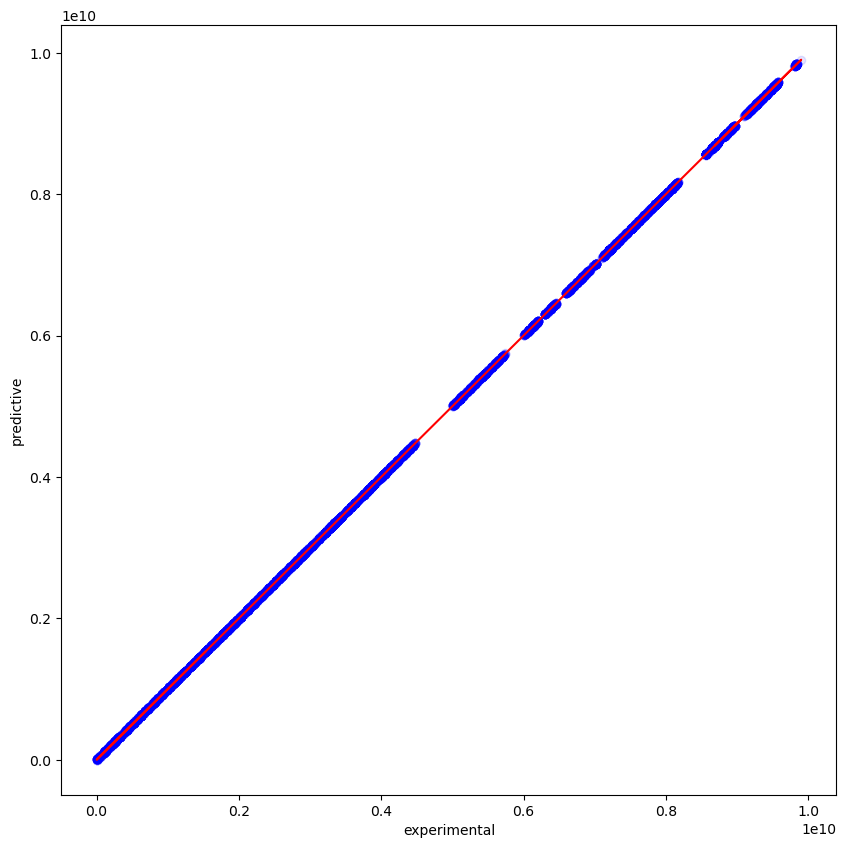

In [233]:
# visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(x=y_train , y=y_lr_train_pred , color="blue" ,alpha=0.1)

z = np.polyfit(y_train ,y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train ,p(y_train) , color="red")
plt.xlabel('experimental')
plt.ylabel('predictive')